<a href="https://colab.research.google.com/github/saritmaitra/Loan_approval_system/blob/main/EDA_Loan_Approval_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
## Business Problem
- Home loan company/bank gets application for loan from variour customers (loan applicants) where based on certain inputs company validates the customer eligibility for loan. 
- We want to automate the loan eligibility process (real time) based on customer detail obtained during loan application. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 
## Business goal
- If the loan approval process is automated, it can save a lot of man hours and improve the speed of service to the customers. 
- The increase in customer satisfaction and savings in operational costs are significant. 
- However, the benefits can only be reaped if the bank has a robust model to accurately predict which application it should approve and which to reject, in order to minimize the risk of loan default.

## Let us translate Business Problem into Data Science / Machine Learning problem
- This is a classification problem where we have to predict whether a loan will be approved or not. 
- Specifically, it is a binary classification problem where we have to predict either one of the two classes given i.e. approved (Y) or not approved (N).  
- Other way to frame the problem is to predict whether the loan will likely to default or not. 
- The dependent variable is the Loan_Status, while the rest are independent variable or features. 
- We need to develop a model using the features to predict the target variable.

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_train.csv to loan_train.csv


## Exploratory Data Analysis (EDA)

In [3]:
# Import data 
df = pd.read_csv("loan_train.csv")
print('Information on dataset:')
df.info()

Information on dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
print('Head:'); print(df.head()); print(); print('Tail:'); print(df.tail());

Head:
    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0  LP001002   Male      No          0      Graduate            No             5849                0.0         NaN             360.0             1.0   
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0   
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0   
3  LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0   
4  LP001008   Male      No          0      Graduate            No             6000                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N


## Hypothesis Generation
Through this process, all the possible factors are listed here which can affect the outcome i.e. which of the features will have an impact on whether a loan will be approved or not. 

Some of the hypothesis are:
- Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval
- Income: Applicants with higher income should have more chances of loan approval
- Loan amount: If the loan amount is less, the chances of loan approval should be high
- Loan term: Loans with shorter time period should have higher chances of approval
- Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval
- Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high And so on

Some of the hypothesis are intuitive while others may not. We will try to validate each of these hypothesis based on the dataset.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Exploratory data analysis

## Univariate analysis

###Target Variable (Categorical)

In [6]:
plt.style.use('ggplot')

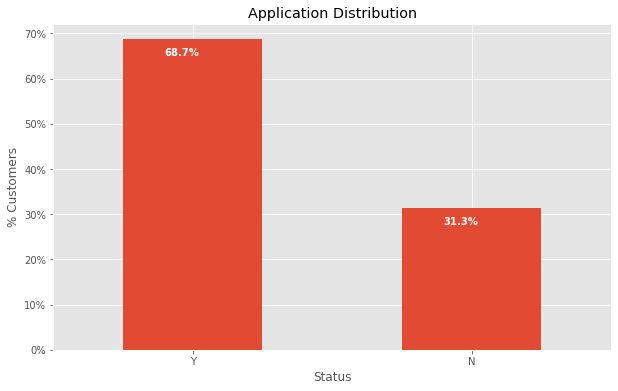

In [ ]:
from pylab import rcParams
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

# bar plot to visualize the frequency
ax = (df['Loan_Status'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Loan application')
ax.set_xlabel('Status')
ax.set_ylabel('% Customers')
ax.set_title('Application Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')


The loan of around 68.7% was approved. There is no imbalanced classes issue in this dataset, thus accuracy as an evaluation metric should be appropriate.

### Independent Variable (Categorical)
There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

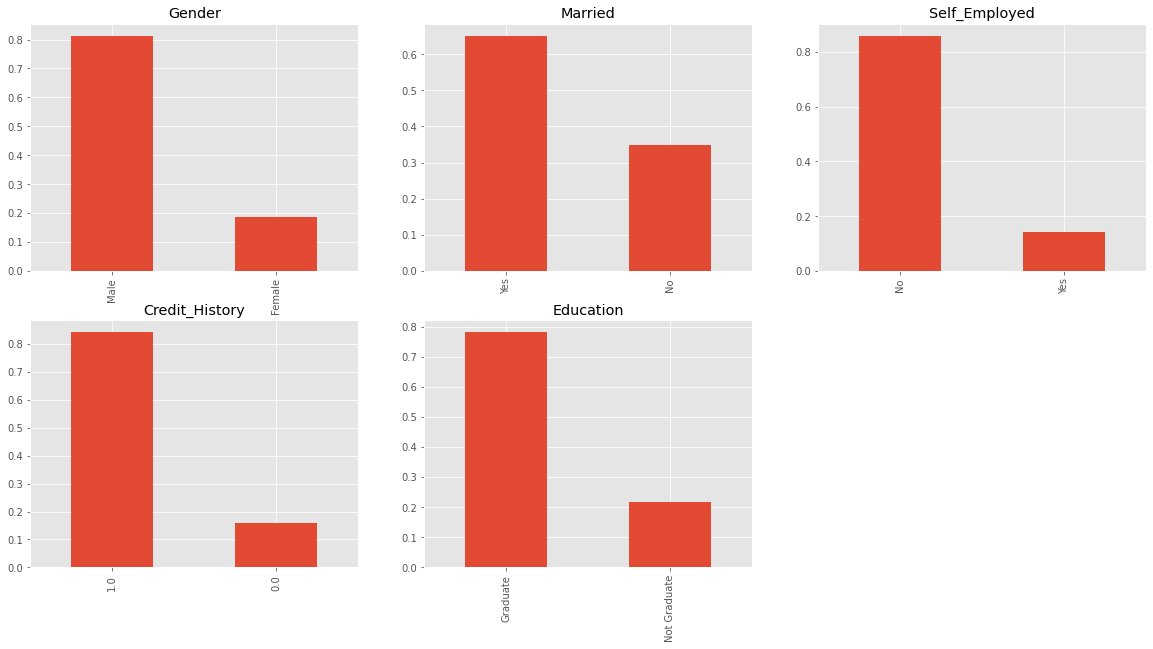

In [ ]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

- 80% applicants in the dataset are male.
- 65% of the applicants in the dataset are married.
- 15% applicants in the dataset are self employed.
- 85% applicants have credit history (repaid their debts).
- 80% of the applicants are Graduate.
### Independent Variable (Ordinal)
There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

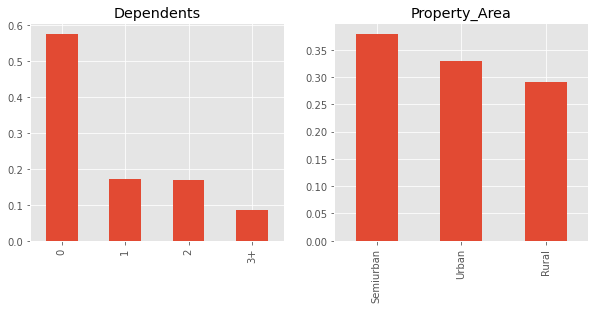

In [ ]:
# Remaining categorical features
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

- More than half of the applicants don’t have any dependents.
- Most of the applicants are from Semiurban area.
### Independent Variable 
There are 4 features that are Numerical: 
- ApplicantIncome, 
- CoapplicantIncome, 
- LoanAmount, 
- Loan_Amount_Term

### Applicant income distribution

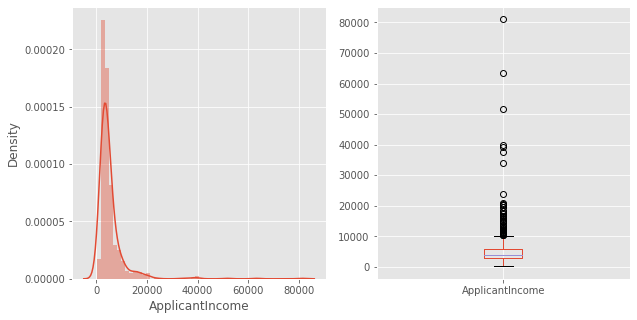

In [ ]:
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(10,5))

plt.show()

- Most of the data in the distribution of applicant income is towards left which means it is not normally distributed. 
- Distribution is right-skewed. 
- We need to make it normal.

The boxplot confirms the presence of a lot of outliers/extreme values. 

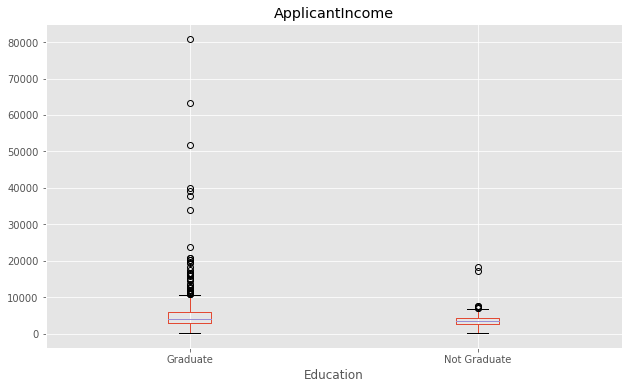

In [ ]:
# Income vs Education
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle(""); plt.show()

higher number of graduates with very high incomes, which are appearing to be the outliers.

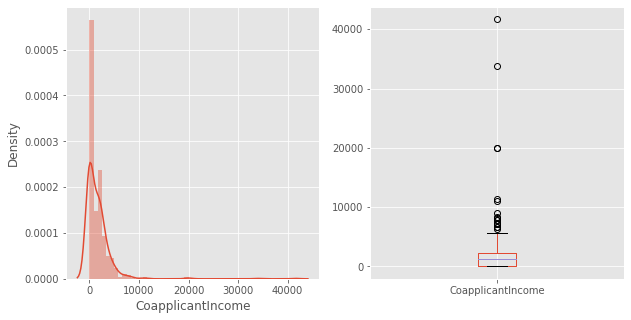

In [ ]:
# co-applicant income distribution
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(10,5))
plt.show()

Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

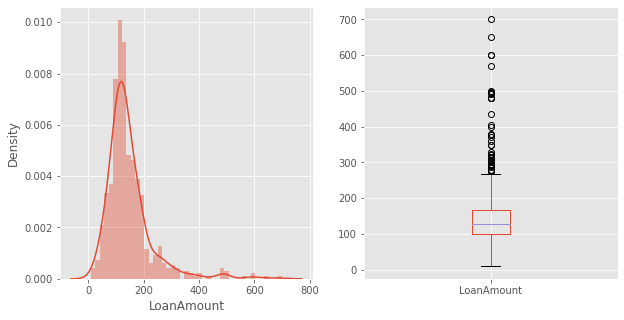

In [ ]:
# distribution of LoanAmount
plt.subplot(121)
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(10,5))

plt.show()

normal distribution but still slightly right-skewed for LoanAmount but there are lot of outliers in this variable. 

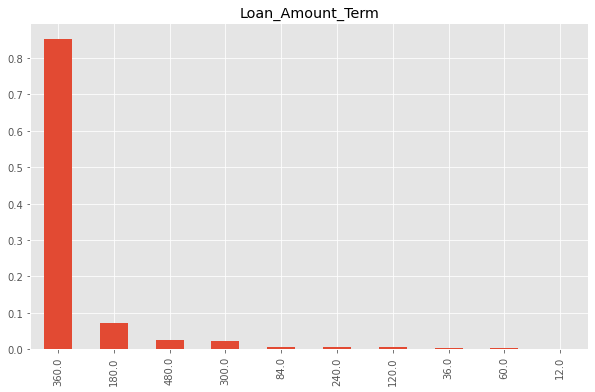

In [ ]:
# distribution of Loan_Amount_Term
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')
plt.show()

- 85% of the loans are 360 months term/30 years period
## Bivariate Analysis

### Categorical Independent Variable vs Target Variable


Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


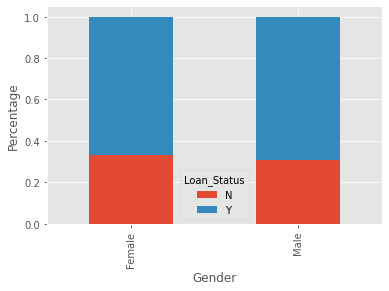

In [ ]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


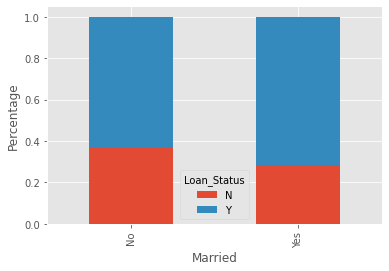

In [ ]:
print(pd.crosstab(df['Married'],df['Loan_Status']))
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


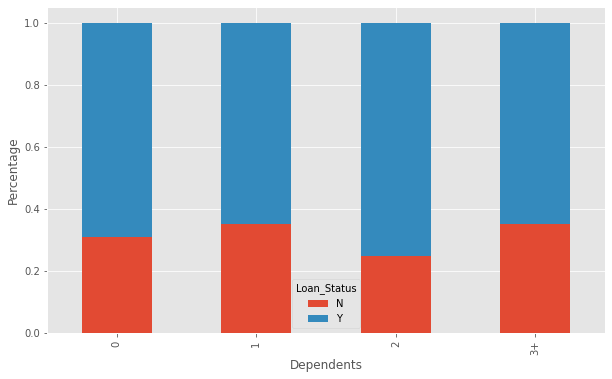

In [ ]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


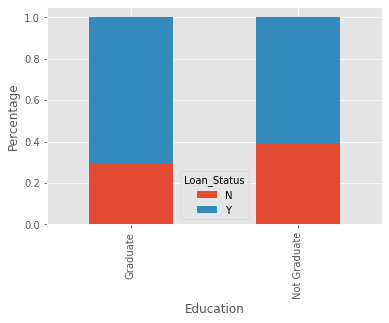

In [ ]:
print(pd.crosstab(df['Education'],df['Loan_Status']))
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


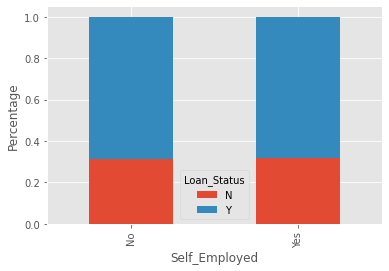

In [ ]:
print(pd.crosstab(df['Self_Employed'], df['Loan_Status']))
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


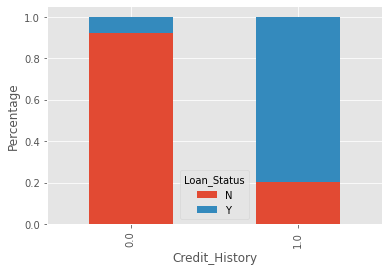

In [ ]:
print(pd.crosstab(df['Credit_History'], df['Loan_Status']))
Credit_History=pd.crosstab(df['Credit_History'], df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


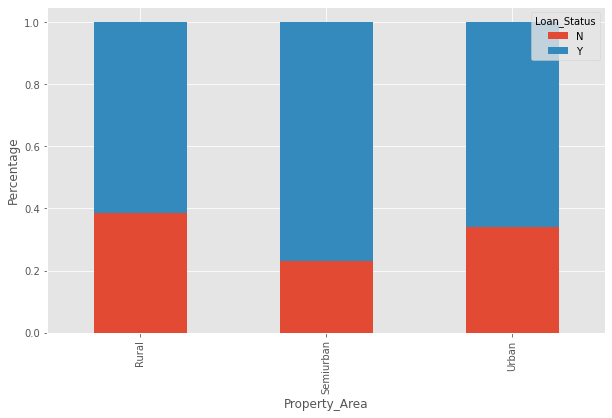

In [ ]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

- proportion of male and female applicants is more or less same for both approved and unapproved loans
- proportion of married applicants is higher for the approved loans
distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
- proportion of loans getting approved for graduates is higher compared to non-graduates it seems people with credit history as 1 are more likely to get their loans approved
- proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.
### Numerical Independent Variable vs Target Variable

In [8]:
df[df['ApplicantIncome'] > 20000].sort_values(by = 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


All applicants with an income greater than 20,000 have higher level of education, it seems reasonable that these applicants would have higher income. However, since most of the dataset is comprised of applicants with higher education this alone would not explain the difference. However, for most of these points there is nothing indicating we should remove these points.

If we look at row 409, we see that this applicant's income is the largest in our dataset, and suspiciously ends in three 0's. Futhermore, the property area is rural, the credit history is marked 0, and the loan status is marked as having been declined. Given this information it is most likely that the applicant income was entered incorrectly. 

**We should drop this point**

In [9]:
df = df.drop(409)

In [10]:
df[df['LoanAmount'] > 400 ].sort_values(by = 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
432,LP002386,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N


Only 4 out of 15 of the loans were denied, but since many of the incomes are fairly high this doesn't seem completely unreasonable.

While some of these points could be questioned, we lack significant evidence that any of these points should be removed.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


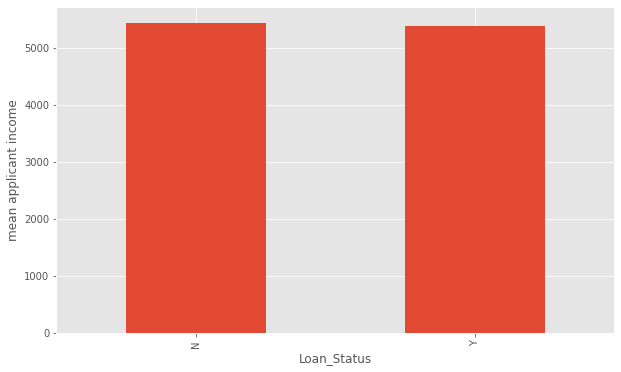

In [ ]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
P = plt.ylabel('mean applicant income')
plt.show()

In [ ]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


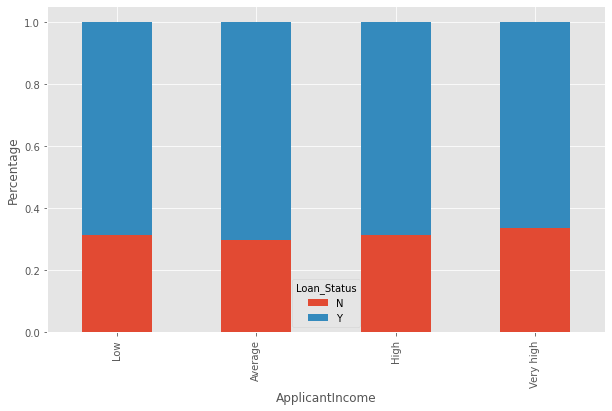

In [ ]:
print(pd.crosstab(df['Income_bin'],df['Loan_Status']))
Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')
plt.show()

Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high

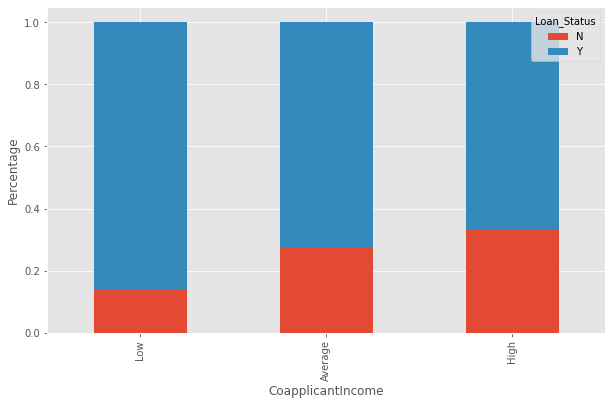

In [ ]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
df['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

# plot the chart
Coapplicant_Income_bin = pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')
plt.show()

In [ ]:
print(len(df[df["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(df[df["CoapplicantIncome"] == 0])/len(df["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

- Historically if coapplicant’s income is less the chances of loan approval are high. 
- However, most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 
- So we can make a new variable in which we will combine the applicant’s and coapplicant’s income 

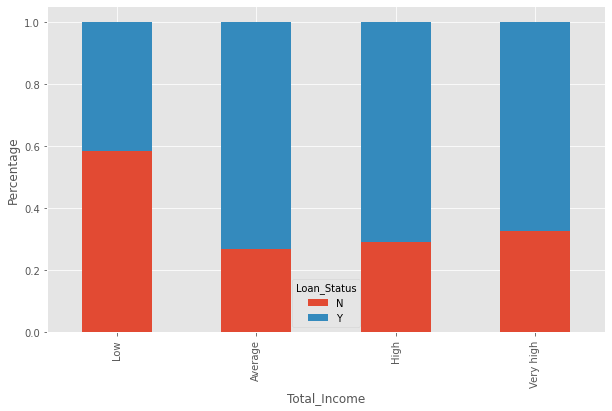

In [ ]:
# create a new variable
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Total_Income_bin'] = pd.cut(df['Total_Income'],bins,labels=group)

# plot the chart
Total_Income_bin = pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')
plt.show()

- Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. 
- This is more consistent with our hypothesis with applicants with high income will have more chances of loan approval.

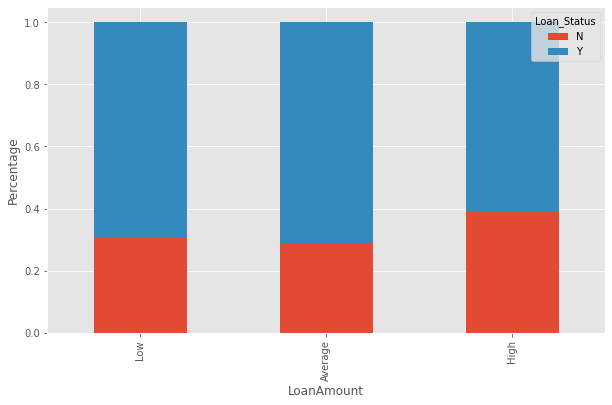

In [ ]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
df['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

# plot the chart 
LoanAmount_bin = pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')
plt.show()

- proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [ ]:
# drop the new variable of bins
df.drop(columns= ['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# replacing 3+ in Dependents variable with 3 for both train and test set
df['Dependents'].replace('3+', 3, inplace=True)
df.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


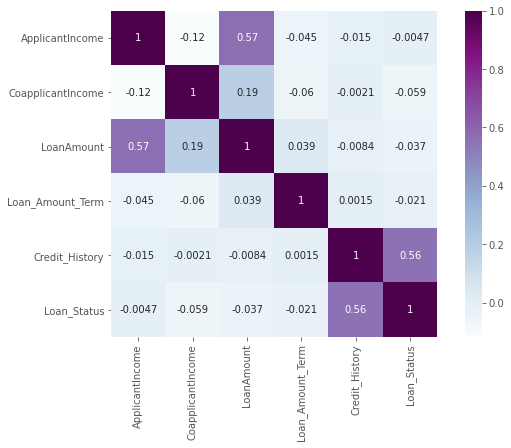

In [ ]:
# calculate and visualize correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)
matrix

## Multi-variate analysis

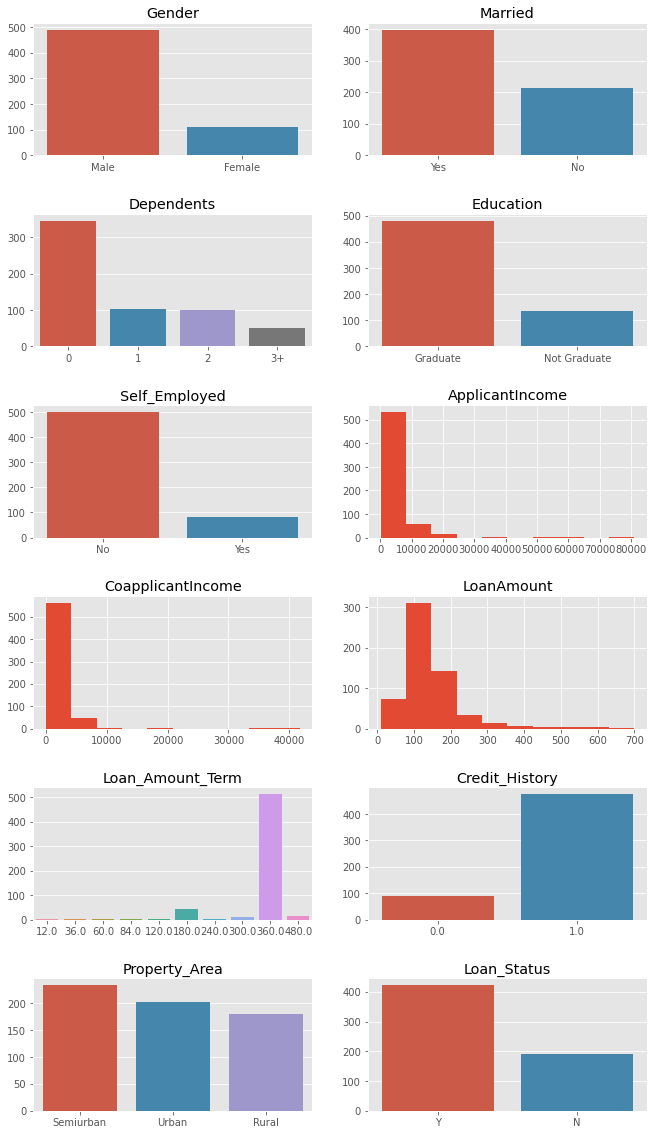

In [7]:
i, j = 0, 0
f, axes = plt.subplots(6, 2, figsize = (11, 20))
plt.subplots_adjust(hspace = .45)

for col in df.columns[1:]:
    if col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
        axes[i,j].hist(df[col].dropna())
    else:
        bar_data = df[col].value_counts()
        sns.barplot(bar_data.index, bar_data.values, ax = axes[i,j])
    axes[i, j].set_title(col)
    axes[i, j].spines['top'].set_visible(False)
    axes[i, j].spines['right'].set_visible(False)
    j += 1 
    if j ==2:
        i += 1
        j = 0

less than half of our loans classified as not accepted, therefore perform stratefied cv would be a better approach.

# Data Pre-processing

### Missing value and outlier treatment


In [11]:
#report number of missing values for each feature
for col in df.columns:
    missing_series = df[col][df[col].isna() == True]
    if missing_series.size > 0:
        print(col, missing_series.size)
    plt.show()

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


- numerical variables: imputation using mean or median
- categorical variables: imputation using mode
- There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we fill them using the mode of the features. 
- If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [12]:
#fill missing categorical values with mode
categ_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in categ_cols:
    df[col] = df[col].fillna(df[col].mode()[0])    

In [ ]:
df['Loan_Amount_Term'].value_counts()
# value of 360 is repeating the most. 
# So we will replace the missing values in this variable using the mode of this variable.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# replace missing value with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# replace missing values with the median value due to outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Loading test set

In [14]:
uploaded = files.upload()

Saving loan_test.csv to loan_test.csv


In [15]:
# Import data 
df1 = pd.read_csv("loan_test.csv")
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [17]:
# replacing 3+ in Dependents variable with 3 for both train and test set
df1['Dependents'].replace('3+', 3, inplace=True)

# replace missing values in Test set with mode/median from Training set
df1['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df1['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df1['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df1['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df1['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df1['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# check whether all the missing values are filled in the Test dataset
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment

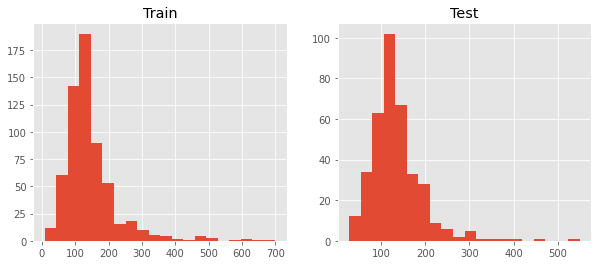

In [ ]:
# original data

ax1 = plt.subplot(121)
df['LoanAmount'].hist(bins=20, figsize=(10,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
df1['LoanAmount'].hist(bins=20)
ax2.set_title("Test")
plt.show()

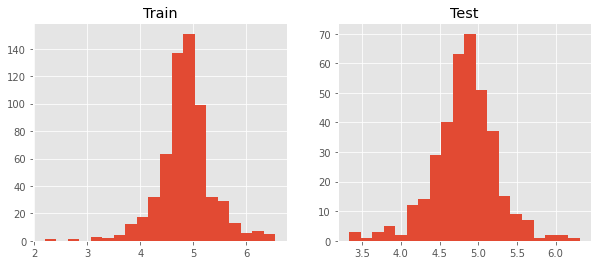

In [ ]:
# Removing skewness in LoanAmount variable by log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df1['LoanAmount_log'] = np.log(df1['LoanAmount'])

# after log transformation

ax1 = plt.subplot(121)
df['LoanAmount_log'].hist(bins=20, figsize=(10,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
df1['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")
plt.show()